<a href="https://colab.research.google.com/github/AUMANSH/Data-Science-Projects/blob/main/RANSOMWARE_DETECTION_USING(i)CNN_AND_(ii)LSTM(III)_BI_LSTM_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

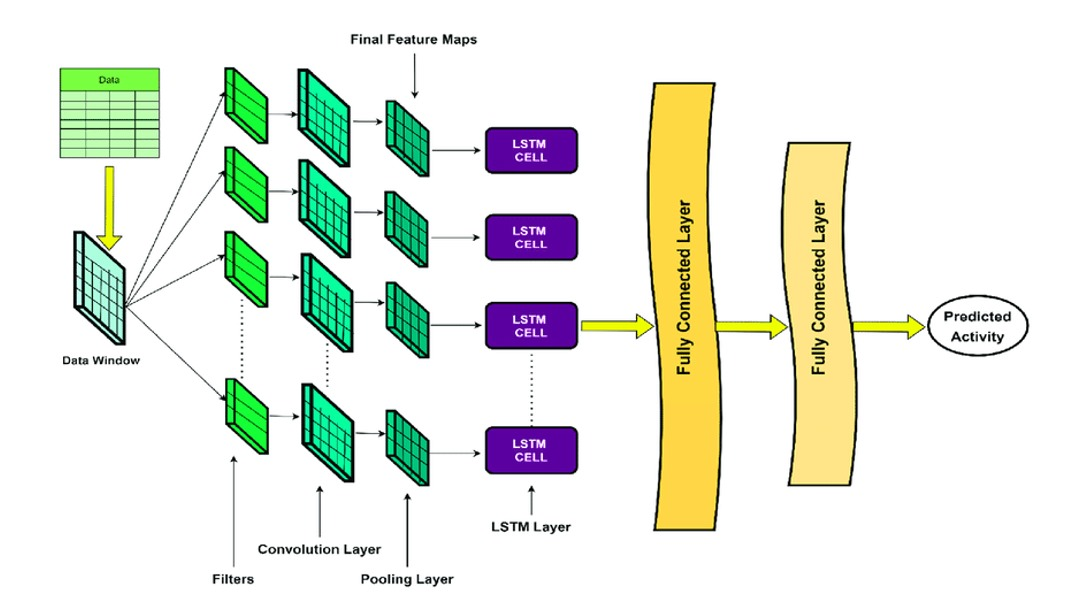

There has been an increase in ransomware attacks, which have become a severe cybersecurity concern, causing substantial financial and operational losses in many sectors. These cannot usually detect sophisticated and evolving ransomware attacks because they tend to be based on traditional detection methods, such as signature-based and heuristic approaches that are always short-lived. Therefore, this study investigated whether deep learning models and advanced feature engineering techniques could improve ransomware detection. Ransomware attacks have rapidly emerged as one of the most damaging cyber threats, with significant consequences for individuals, corporations, and governments worldwide. As traditional detection methods struggle to keep up with increasingly sophisticated attack patterns, deep learning and feature engineering techniques have shown great potential in improving the detection accuracy of ransomware. This comprehensive review explores recent advances in deep learning models, particularly convolutional neural networks (CNNs), recurrent neural networks (RNNs), autoencoders, and feature engineering techniques that improve ransomware detection. We also highlight challenges, limitations, and future research directions in this evolving domain. This paper emphasizes the significance of feature engineering in deep learning applications, paving the way for future development in cybersecurity. With better findings, we help build more robust, adaptable security solutions through improved capability to detect ransomware.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import numpy as np

In [ ]:
df = pd.read_csv("/content/data_file.csv")
cols_to_drop = ['FileName', 'md5Hash']
df = df.drop(columns=cols_to_drop)
df.drop_duplicates(keep='last', inplace=True)
df.to_csv("df_clear.csv")

In [ ]:
df = pd.read_csv("df_clear.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32256 entries, 0 to 32255
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Unnamed: 0          32256 non-null  int64
 1   Machine             32256 non-null  int64
 2   DebugSize           32256 non-null  int64
 3   DebugRVA            32256 non-null  int64
 4   MajorImageVersion   32256 non-null  int64
 5   MajorOSVersion      32256 non-null  int64
 6   ExportRVA           32256 non-null  int64
 7   ExportSize          32256 non-null  int64
 8   IatVRA              32256 non-null  int64
 9   MajorLinkerVersion  32256 non-null  int64
 10  MinorLinkerVersion  32256 non-null  int64
 11  NumberOfSections    32256 non-null  int64
 12  SizeOfStackReserve  32256 non-null  int64
 13  DllCharacteristics  32256 non-null  int64
 14  ResourceSize        32256 non-null  int64
 15  BitcoinAddresses    32256 non-null  int64
 16  Benign              32256 non-null  int6

In [ ]:
X = df.iloc[:, 1:-1].values
Y = df.iloc[:, -1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
history = model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=20, batch_size=32, validation_data=(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test), callbacks=[early_stopping])

Epoch 1/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.8735 - loss: 0.2763 - val_accuracy: 0.9608 - val_loss: 0.1132
Epoch 2/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9570 - loss: 0.1194 - val_accuracy: 0.9735 - val_loss: 0.0882
Epoch 3/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - accuracy: 0.9676 - loss: 0.0911 - val_accuracy: 0.9769 - val_loss: 0.0767
Epoch 4/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.9729 - loss: 0.0771 - val_accuracy: 0.9771 - val_loss: 0.0742
Epoch 5/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.9763 - loss: 0.0676 - val_accuracy: 0.9780 - val_loss: 0.0675
Epoch 6/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9747 - loss: 0.0704 - val_accuracy: 0.9785 - val_loss: 0.0630
Epoch 7/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.9783 - loss: 0.0641 - val_accuracy: 0.9800 - val_loss: 0.0584
Epoch 8/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.9781 - loss: 0.0616 - 

In [ ]:
accuracy = model.evaluate(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test, verbose=0)[1]
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.98


In [ ]:
y_pred = (model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1)) > 0.5).astype("int32")

202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[2099   42]
 [  80 4231]]


<Figure size 640x480 with 0 Axes>

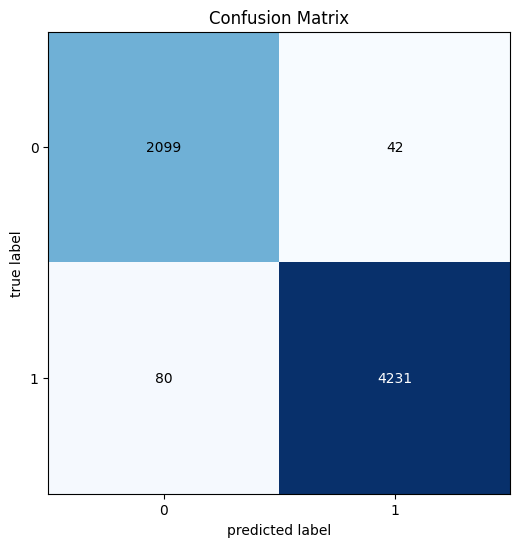

In [ ]:
plt.figure()
plot_confusion_matrix(cm, figsize=(8, 6))
plt.title("Confusion Matrix")
plt.show()

In [ ]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2141
           1       0.99      0.98      0.99      4311

    accuracy                           0.98      6452
   macro avg       0.98      0.98      0.98      6452
weighted avg       0.98      0.98      0.98      6452



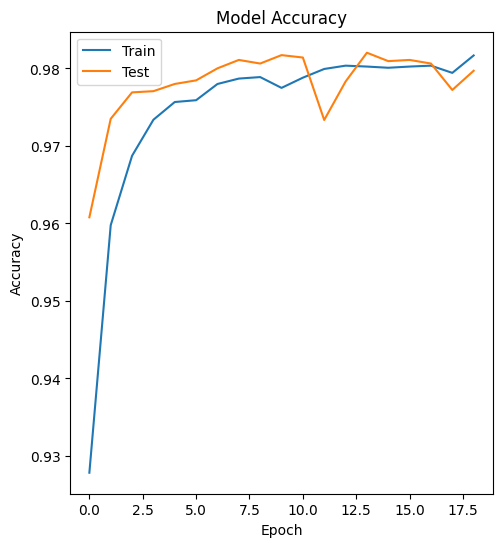

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

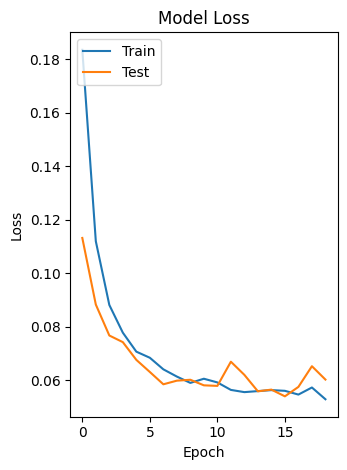

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.tight_layout()
plt.show()

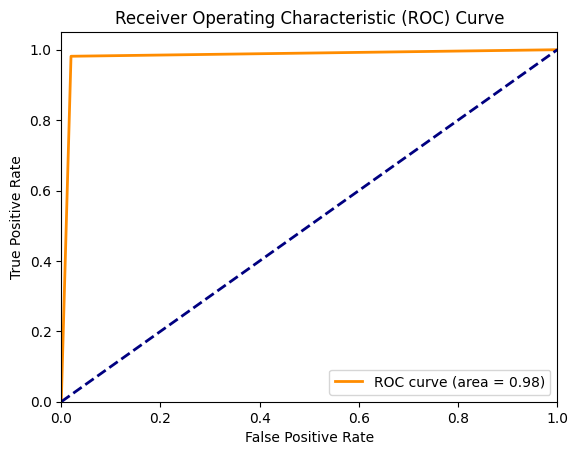

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

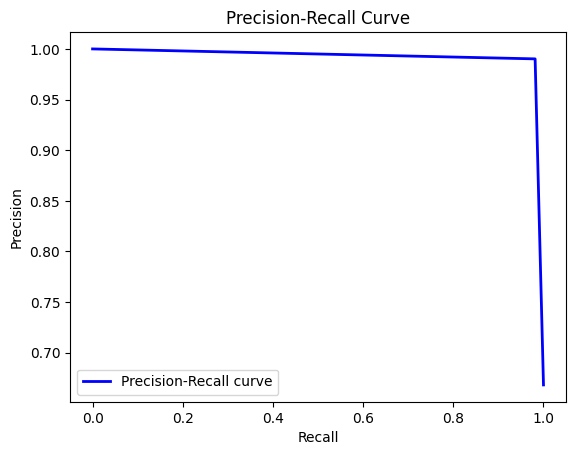

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

In [ ]:
print("Enter the features for a test case:")
test_case = []
feature_names = df.columns[1:-1]
for feature_name in feature_names:
    value = float(input(f"Enter the value for {feature_name}: "))
    test_case.append(value)
test_case = np.array(test_case).reshape(1, -1, 1)
predicted_prob = model.predict(test_case)[0][0]
predicted_label = "Benign" if predicted_prob > 0.5 else "Malicious"
print("\nTest Case:")
print(test_case)
print("Predicted Probability:", predicted_prob)
print("Predicted Label:", predicted_label)

Enter the features for a test case:
Enter the value for Machine: 332
Enter the value for DebugSize: 0
Enter the value for DebugRVA: 0
Enter the value for MajorImageVersion: 0
Enter the value for MajorOSVersion: 4
Enter the value for ExportRVA: 0
Enter the value for ExportSize: 0
Enter the value for IatVRA: 8520
Enter the value for MajorLinkerVersion: 6
Enter the value for MinorLinkerVersion: 0
Enter the value for NumberOfSections: 2
Enter the value for SizeOfStackReserve: 1048576
Enter the value for DllCharacteristics: 0
Enter the value for ResourceSize: 0
Enter the value for BitcoinAddresses: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step

Test Case:
[[[3.320000e+02]
  [0.000000e+00]
  [0.000000e+00]
  [0.000000e+00]
  [4.000000e+00]
  [0.000000e+00]
  [0.000000e+00]
  [8.520000e+03]
  [6.000000e+00]
  [0.000000e+00]
  [2.000000e+00]
  [1.048576e+06]
  [0.000000e+00]
  [0.000000e+00]
  [0.000000e+00]]]
Predicted Probability: 0.041570656
Predicted Label: Malicious


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from keras.models import Sequential
from keras.layers import LSTM, Dense, Conv1D, Flatten
from keras.callbacks import EarlyStopping
from sklearn.metrics import roc_curve, precision_recall_curve, auc



In [ ]:
# Load and preprocess data
df = pd.read_csv("/content/data_file.csv")
cols_to_drop = ['FileName', 'md5Hash']
df = df.drop(columns=cols_to_drop)
df.drop_duplicates(keep='last', inplace=True)
df.to_csv("df_clear.csv")
df = pd.read_csv("df_clear.csv")
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32256 entries, 0 to 32255
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Unnamed: 0          32256 non-null  int64
 1   Machine             32256 non-null  int64
 2   DebugSize           32256 non-null  int64
 3   DebugRVA            32256 non-null  int64
 4   MajorImageVersion   32256 non-null  int64
 5   MajorOSVersion      32256 non-null  int64
 6   ExportRVA           32256 non-null  int64
 7   ExportSize          32256 non-null  int64
 8   IatVRA              32256 non-null  int64
 9   MajorLinkerVersion  32256 non-null  int64
 10  MinorLinkerVersion  32256 non-null  int64
 11  NumberOfSections    32256 non-null  int64
 12  SizeOfStackReserve  32256 non-null  int64
 13  DllCharacteristics  32256 non-null  int64
 14  ResourceSize        32256 non-null  int64
 15  BitcoinAddresses    32256 non-null  int64
 16  Benign              32256 non-null  int6

In [ ]:
X = df.iloc[:, 1:-1].values
Y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:

# Define the model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [ ]:

# Fit the model
history = model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train,
                    epochs=20, batch_size=32,
                    validation_data=(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test),
                    callbacks=[early_stopping])


Epoch 1/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9324 - loss: 0.1788 - val_accuracy: 0.9653 - val_loss: 0.1101
Epoch 2/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.9689 - loss: 0.0934 - val_accuracy: 0.9724 - val_loss: 0.0816
Epoch 3/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9729 - loss: 0.0794 - val_accuracy: 0.9724 - val_loss: 0.0791
Epoch 4/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.9781 - loss: 0.0662 - val_accuracy: 0.9783 - val_loss: 0.0752
Epoch 5/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 43s 29ms/step - accuracy: 0.9795 - loss: 0.0623 - val_accuracy: 0.9738 - val_loss: 0.0807
Epoch 6/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9796 - loss: 0.0622 - val_accuracy: 0.9763 - val_loss: 0.0719
Epoch 7/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9767 - loss: 0.0631 - val_accuracy: 0.9750 - val_loss: 0.0656
Epoch 8/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.9812 - loss: 0.0565 - 

In [ ]:

# Evaluate the model
accuracy = model.evaluate(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test, verbose=0)[1]
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.98


202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Confusion Matrix:
[[2101   31]
 [ 105 4215]]


<Figure size 640x480 with 0 Axes>

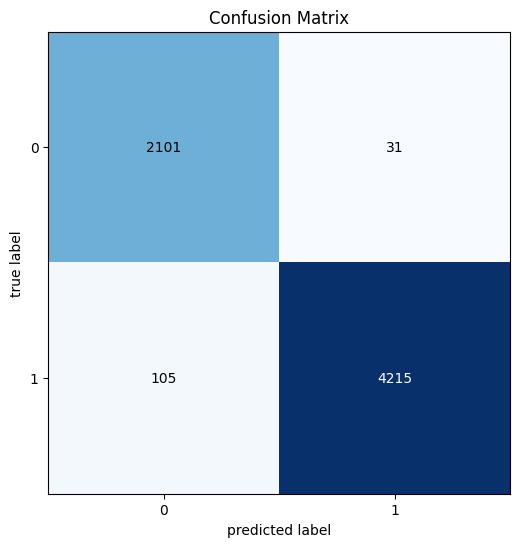

In [ ]:

# Confusion matrix
y_pred = (model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1)) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
plt.figure()
plot_confusion_matrix(cm, figsize=(8, 6))
plt.title("Confusion Matrix")
plt.show()



In [ ]:
# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2132
           1       0.99      0.98      0.98      4320

    accuracy                           0.98      6452
   macro avg       0.97      0.98      0.98      6452
weighted avg       0.98      0.98      0.98      6452



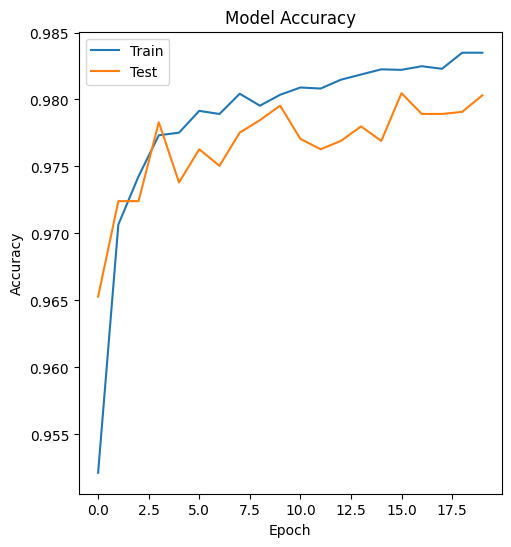

In [ ]:

# Plot accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')


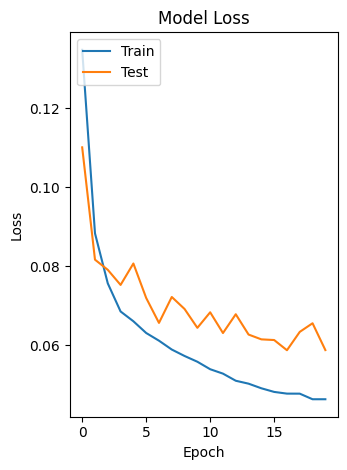

In [ ]:

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.tight_layout()
plt.show()



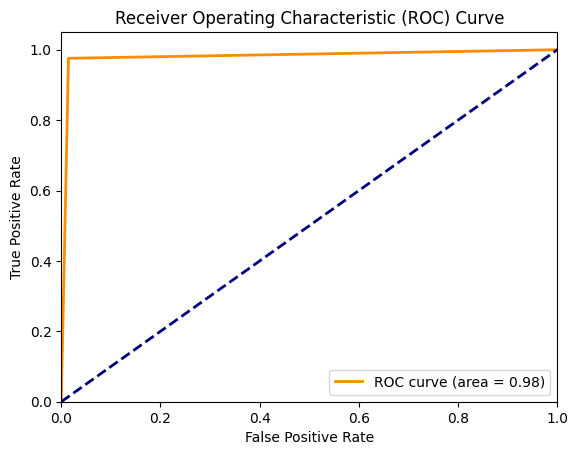

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



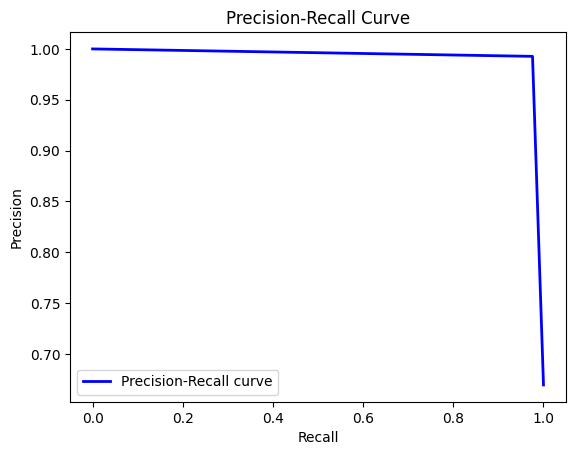

In [ ]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()



In [ ]:
# Predict on a single test case
print("Enter the features for a test case:")
test_case = []
feature_names = df.columns[1:-1]
for feature_name in feature_names:
    value = float(input(f"Enter the value for {feature_name}: "))
    test_case.append(value)

test_case = np.array(test_case).reshape(1, -1, 1)
predicted_prob = model.predict(test_case)[0][0]
predicted_label = "Benign" if predicted_prob > 0.5 else "Malicious"
print("\nTest Case:")
print(test_case)
print("Predicted Probability:", predicted_prob)
print("Predicted Label:", predicted_label)

Enter the features for a test case:
Enter the value for Machine: 332
Enter the value for DebugSize: 0
Enter the value for DebugRVA: 0
Enter the value for MajorImageVersion: 4
Enter the value for MajorOSVersion: 4
Enter the value for ExportRVA: 0
Enter the value for ExportSize: 0
Enter the value for IatVRA: 8520
Enter the value for MajorLinkerVersion: 6
Enter the value for MinorLinkerVersion: 0
Enter the value for NumberOfSections: 2
Enter the value for SizeOfStackReserve: 1048576
Enter the value for DllCharacteristics: 0
Enter the value for ResourceSize: 0
Enter the value for BitcoinAddresses: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step

Test Case:
[[[3.320000e+02]
  [0.000000e+00]
  [0.000000e+00]
  [4.000000e+00]
  [4.000000e+00]
  [0.000000e+00]
  [0.000000e+00]
  [8.520000e+03]
  [6.000000e+00]
  [0.000000e+00]
  [2.000000e+00]
  [1.048576e+06]
  [0.000000e+00]
  [0.000000e+00]
  [0.000000e+00]]]
Predicted Probability: 0.010767829
Predicted Label: Malicious


BI LSTM

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense, Conv1D, Flatten
from keras.callbacks import EarlyStopping
from sklearn.metrics import roc_curve, precision_recall_curve, auc

In [ ]:
X = df.iloc[:, 1:-1].values
Y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Define the model with Bidirectional LSTM
model = Sequential()
model.add(Bidirectional(LSTM(100, return_sequences=True), input_shape=(X_train.shape[1], 1)))
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
# Fit the model
history = model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train,
                    epochs=20, batch_size=32,
                    validation_data=(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test),
                    callbacks=[early_stopping])


Epoch 1/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9364 - loss: 0.1700 - val_accuracy: 0.9667 - val_loss: 0.1105
Epoch 2/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9699 - loss: 0.0872 - val_accuracy: 0.9715 - val_loss: 0.0836
Epoch 3/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9753 - loss: 0.0785 - val_accuracy: 0.9777 - val_loss: 0.0753
Epoch 4/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9767 - loss: 0.0702 - val_accuracy: 0.9780 - val_loss: 0.0682
Epoch 5/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9775 - loss: 0.0650 - val_accuracy: 0.9749 - val_loss: 0.0740
Epoch 6/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9788 - loss: 0.0639 - val_accuracy: 0.9777 - val_loss: 0.0683
Epoch 7/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.9811 - loss: 0.0568 - val_accuracy: 0.9795 - val_loss: 0.0713


In [ ]:
# Evaluate the model
accuracy = model.evaluate(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test, verbose=0)[1]
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.98


202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Confusion Matrix:
[[2068   64]
 [  78 4242]]


<Figure size 640x480 with 0 Axes>

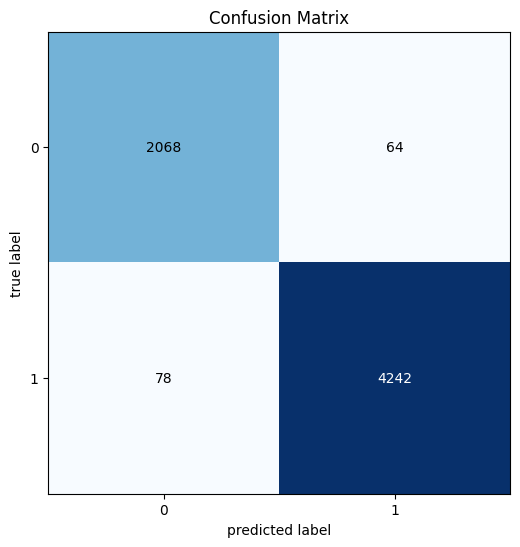

In [ ]:
# Confusion matrix
y_pred = (model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1)) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
plt.figure()
plot_confusion_matrix(cm, figsize=(8, 6))
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2132
           1       0.99      0.98      0.98      4320

    accuracy                           0.98      6452
   macro avg       0.97      0.98      0.98      6452
weighted avg       0.98      0.98      0.98      6452



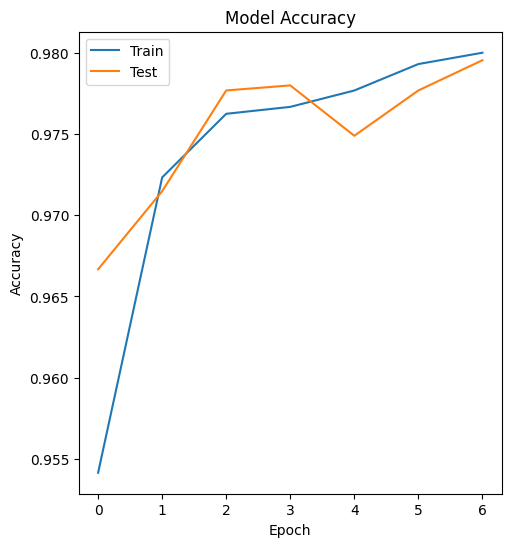

In [ ]:

# Plot accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')


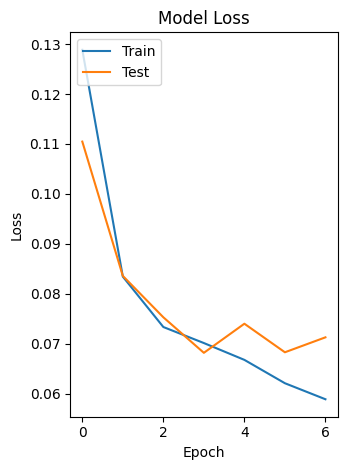

In [ ]:

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.tight_layout()
plt.show()



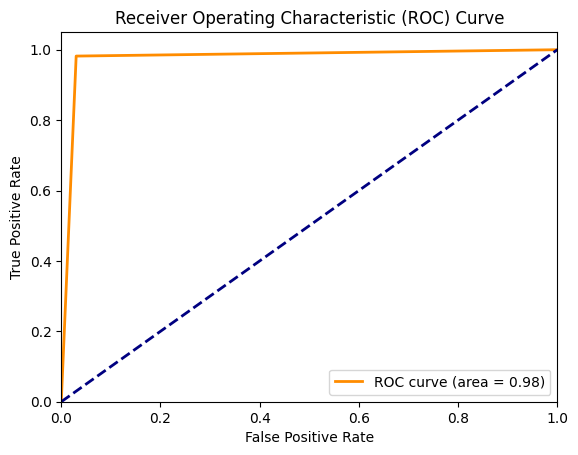

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



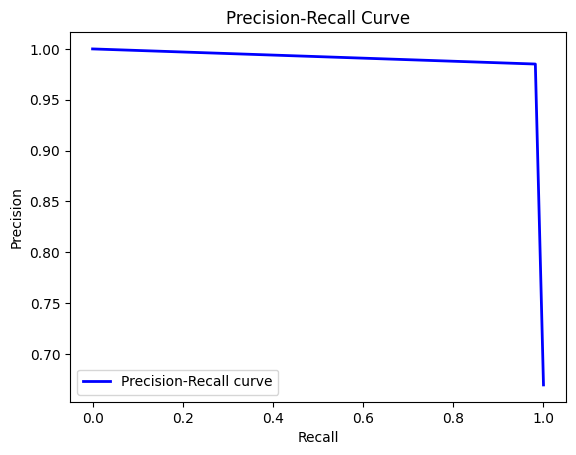

In [ ]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()



In [ ]:
# Predict on a single test case
print("Enter the features for a test case:")
test_case = []
feature_names = df.columns[1:-1]
for feature_name in feature_names:
    value = float(input(f"Enter the value for {feature_name}: "))
    test_case.append(value)

test_case = np.array(test_case).reshape(1, -1, 1)
predicted_prob = model.predict(test_case)[0][0]
predicted_label = "Benign" if predicted_prob > 0.5 else "Malicious"
print("\nTest Case:")
print(test_case)
print("Predicted Probability:", predicted_prob)
print("Predicted Label:", predicted_label)

Enter the features for a test case:
Enter the value for Machine: 332
Enter the value for DebugSize: 0
Enter the value for DebugRVA: 0
Enter the value for MajorImageVersion: 4
Enter the value for MajorOSVersion: 4
Enter the value for ExportRVA: 0
Enter the value for ExportSize: 0
Enter the value for IatVRA: 8520
Enter the value for MajorLinkerVersion: 6
Enter the value for MinorLinkerVersion: 0
Enter the value for NumberOfSections: 2
Enter the value for SizeOfStackReserve: 1048576
Enter the value for DllCharacteristics: 0
Enter the value for ResourceSize: 0
Enter the value for BitcoinAddresses: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

Test Case:
[[[3.320000e+02]
  [0.000000e+00]
  [0.000000e+00]
  [4.000000e+00]
  [4.000000e+00]
  [0.000000e+00]
  [0.000000e+00]
  [8.520000e+03]
  [6.000000e+00]
  [0.000000e+00]
  [2.000000e+00]
  [1.048576e+06]
  [0.000000e+00]
  [0.000000e+00]
  [0.000000e+00]]]
Predicted Probability: 0.02962158
Predicted Label: Malicious


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from keras.models import Sequential
from keras.layers import GRU, Dense, Conv1D, Flatten, Bidirectional
from keras.callbacks import EarlyStopping
from sklearn.metrics import roc_curve, precision_recall_curve, auc


In [ ]:
# Load and preprocess data
df = pd.read_csv("/content/data_file.csv")  # Replace with your actual file path
cols_to_drop = ['FileName', 'md5Hash']
df = df.drop(columns=cols_to_drop)
df.drop_duplicates(keep='last', inplace=True)
#df.to_csv("df_clear.csv", index=False) # remove index column
df.to_csv("df_clear.csv")


In [ ]:
df = pd.read_csv("df_clear.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32256 entries, 0 to 32255
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Unnamed: 0          32256 non-null  int64
 1   Machine             32256 non-null  int64
 2   DebugSize           32256 non-null  int64
 3   DebugRVA            32256 non-null  int64
 4   MajorImageVersion   32256 non-null  int64
 5   MajorOSVersion      32256 non-null  int64
 6   ExportRVA           32256 non-null  int64
 7   ExportSize          32256 non-null  int64
 8   IatVRA              32256 non-null  int64
 9   MajorLinkerVersion  32256 non-null  int64
 10  MinorLinkerVersion  32256 non-null  int64
 11  NumberOfSections    32256 non-null  int64
 12  SizeOfStackReserve  32256 non-null  int64
 13  DllCharacteristics  32256 non-null  int64
 14  ResourceSize        32256 non-null  int64
 15  BitcoinAddresses    32256 non-null  int64
 16  Benign              32256 non-null  int6

In [ ]:
X = df.iloc[:, 1:-1].values
Y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Define the model with GRU
model = Sequential()
model.add(GRU(100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [ ]:
# Fit the model
history = model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train,
                    epochs=20, batch_size=32,
                    validation_data=(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test),
                    callbacks=[early_stopping])


Epoch 1/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9281 - loss: 0.1826 - val_accuracy: 0.9702 - val_loss: 0.1042
Epoch 2/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9707 - loss: 0.0905 - val_accuracy: 0.9743 - val_loss: 0.0831
Epoch 3/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9761 - loss: 0.0735 - val_accuracy: 0.9659 - val_loss: 0.1029
Epoch 4/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9785 - loss: 0.0688 - val_accuracy: 0.9768 - val_loss: 0.0804
Epoch 5/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9767 - loss: 0.0704 - val_accuracy: 0.9769 - val_loss: 0.0646
Epoch 6/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9786 - loss: 0.0622 - val_accuracy: 0.9781 - val_loss: 0.0745
Epoch 7/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9778 - loss: 0.0596 - val_accuracy: 0.9771 - val_loss: 0.0631
Epoch 8/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9817 - loss: 0.0522 - val_accuracy: 0

In [ ]:
# Evaluate the model
accuracy = model.evaluate(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test, verbose=0)[1]
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.98


202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Confusion Matrix:
[[2050   82]
 [  66 4254]]


<Figure size 640x480 with 0 Axes>

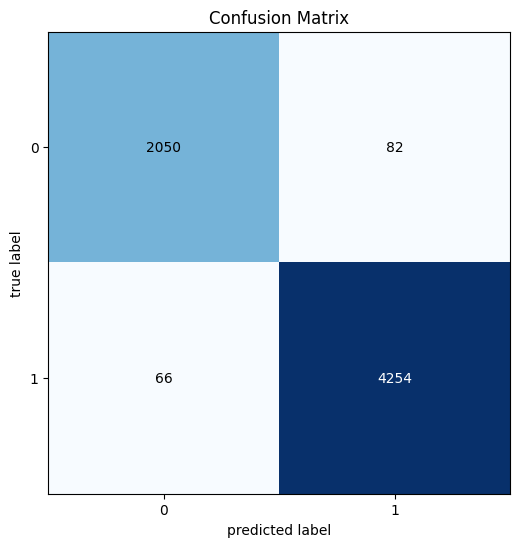

In [ ]:
# Confusion matrix
y_pred = (model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1)) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
plt.figure()
plot_confusion_matrix(cm, figsize=(8, 6))
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2132
           1       0.98      0.98      0.98      4320

    accuracy                           0.98      6452
   macro avg       0.97      0.97      0.97      6452
weighted avg       0.98      0.98      0.98      6452



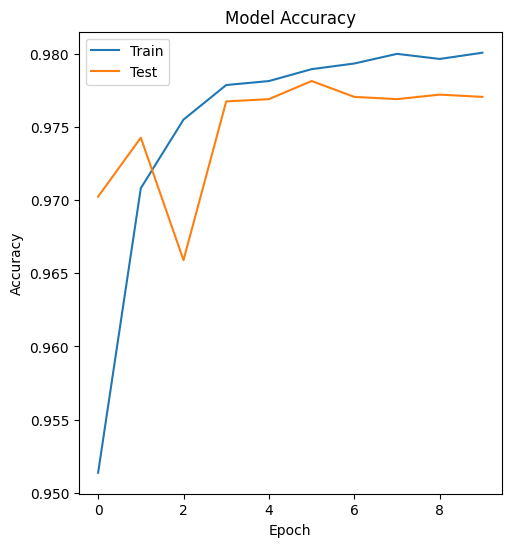

In [ ]:

# Plot accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')


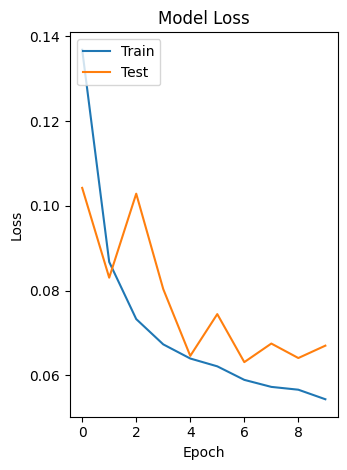

In [ ]:

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.tight_layout()
plt.show()



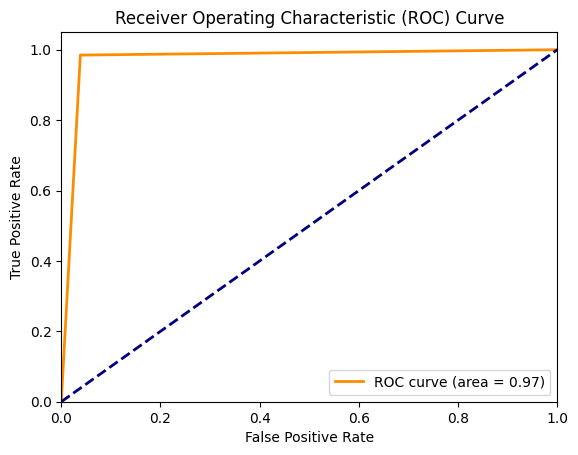

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



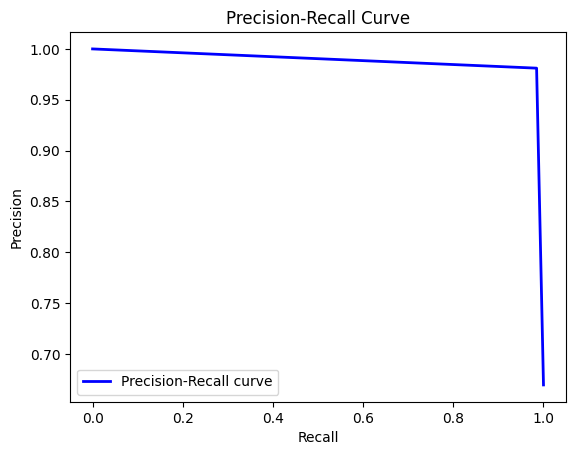

In [ ]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()



In [ ]:
# Predict on a single test case
print("Enter the features for a test case:")
test_case = []
feature_names = df.columns[1:-1]
for feature_name in feature_names:
    value = float(input(f"Enter the value for {feature_name}: "))
    test_case.append(value)

test_case = np.array(test_case).reshape(1, -1, 1)
predicted_prob = model.predict(test_case)[0][0]
predicted_label = "Benign" if predicted_prob > 0.5 else "Malicious"
print("\nTest Case:")
print(test_case)
print("Predicted Probability:", predicted_prob)
print("Predicted Label:", predicted_label)

Enter the features for a test case:
Enter the value for Machine: 332
Enter the value for DebugSize: 0
Enter the value for DebugRVA: 0
Enter the value for MajorImageVersion: 4
Enter the value for MajorOSVersion: 4
Enter the value for ExportRVA: 0
Enter the value for ExportSize: 0
Enter the value for IatVRA: 8520
Enter the value for MajorLinkerVersion: 6
Enter the value for MinorLinkerVersion: 0
Enter the value for NumberOfSections: 2
Enter the value for SizeOfStackReserve: 1048576
Enter the value for DllCharacteristics: 0
Enter the value for ResourceSize: 0
Enter the value for BitcoinAddresses: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step

Test Case:
[[[3.320000e+02]
  [0.000000e+00]
  [0.000000e+00]
  [4.000000e+00]
  [4.000000e+00]
  [0.000000e+00]
  [0.000000e+00]
  [8.520000e+03]
  [6.000000e+00]
  [0.000000e+00]
  [2.000000e+00]
  [1.048576e+06]
  [0.000000e+00]
  [0.000000e+00]
  [0.000000e+00]]]
Predicted Probability: 0.028588943
Predicted Label: Malicious


In [ ]:
!pip install mlxtend
!pip install keras

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from keras.models import Sequential
from keras.layers import LSTM, Dense, Conv1D, Flatten, Bidirectional, GRU
from keras.callbacks import EarlyStopping

In [ ]:
X = df.iloc[:, 1:-1].values
Y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Function to build and train the model
def train_and_evaluate_model(model_type):
    model = Sequential()
    if model_type == "LSTM":
        model.add(LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    elif model_type == "BiLSTM":
        model.add(Bidirectional(LSTM(100, return_sequences=True), input_shape=(X_train.shape[1], 1)))
    elif model_type == "GRU":
        model.add(GRU(100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    else:
        raise ValueError("Invalid model type")

    model.add(Conv1D(64, kernel_size=3, activation='relu'))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    history = model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train,
                        epochs=20, batch_size=32,
                        validation_data=(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test),
                        callbacks=[early_stopping], verbose=0) # Set verbose to 0 to suppress training output
    return model, history

In [ ]:
# Train LSTM, BiLSTM, and GRU models
models = {}
histories = {}
for model_type in ["LSTM", "BiLSTM", "GRU"]:
  models[model_type], histories[model_type] = train_and_evaluate_model(model_type)
  print(f"Finished training {model_type} model")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Finished training LSTM model


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Finished training BiLSTM model
Finished training GRU model


202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion Matrix:
[[2057   75]
 [  52 4268]]


<Figure size 640x480 with 0 Axes>

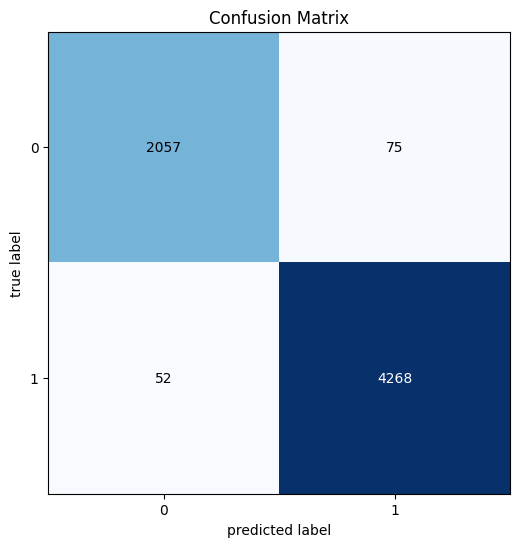

In [ ]:
# Confusion matrix
y_pred = (model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1)) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
plt.figure()
plot_confusion_matrix(cm, figsize=(8, 6))
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Evaluate the model
accuracy = model.evaluate(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test, verbose=0)[1]
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.98


In [ ]:
# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2132
           1       0.98      0.98      0.98      4320

    accuracy                           0.98      6452
   macro avg       0.97      0.97      0.97      6452
weighted avg       0.98      0.98      0.98      6452



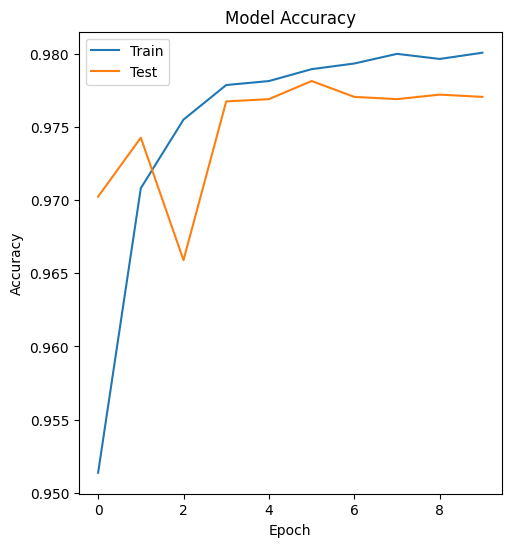

In [ ]:

# Plot accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')


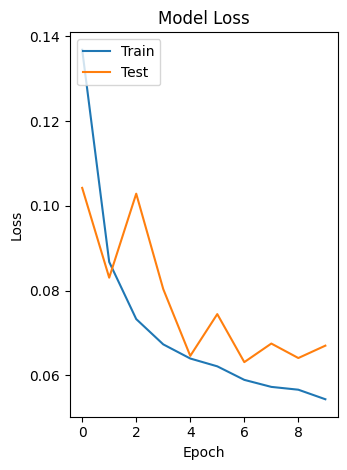

In [ ]:

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.tight_layout()
plt.show()



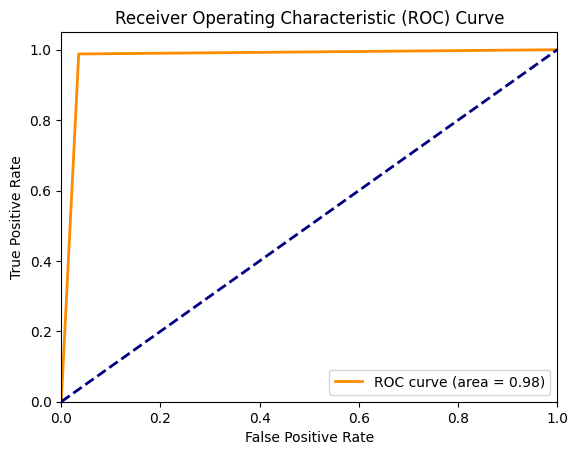

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



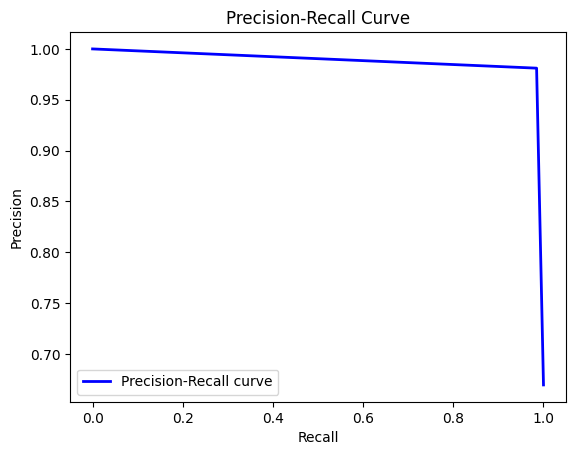

In [ ]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()



In [ ]:
# ... (rest of your code for evaluation and prediction) ...
# Example usage for prediction:
chosen_model_type = "LSTM"  # Choose your preferred model
model = models[chosen_model_type]



In [ ]:
#Predict on a single test case
print("Enter the features for a test case:")
test_case = []
feature_names = df.columns[1:-1]
for feature_name in feature_names:
    value = float(input(f"Enter the value for {feature_name}: "))
    test_case.append(value)

test_case = np.array(test_case).reshape(1, -1, 1)
predicted_prob = model.predict(test_case)[0][0]
predicted_label = "Benign" if predicted_prob > 0.5 else "Malicious"
print("\nTest Case:")
print(test_case)
print("Predicted Probability:", predicted_prob)
print("Predicted Label:", predicted_label)

Enter the features for a test case:
Enter the value for Machine: 332
Enter the value for DebugSize: 0
Enter the value for DebugRVA: 0
Enter the value for MajorImageVersion: 4
Enter the value for MajorOSVersion: 4
Enter the value for ExportRVA: 0
Enter the value for ExportSize: 0
Enter the value for IatVRA: 8520
Enter the value for MajorLinkerVersion: 6
Enter the value for MinorLinkerVersion: 0
Enter the value for NumberOfSections: 2
Enter the value for SizeOfStackReserve: 1048576
Enter the value for DllCharacteristics: 0
Enter the value for ResourceSize: 0
Enter the value for BitcoinAddresses: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step

Test Case:
[[[3.320000e+02]
  [0.000000e+00]
  [0.000000e+00]
  [4.000000e+00]
  [4.000000e+00]
  [0.000000e+00]
  [0.000000e+00]
  [8.520000e+03]
  [6.000000e+00]
  [0.000000e+00]
  [2.000000e+00]
  [1.048576e+06]
  [0.000000e+00]
  [0.000000e+00]
  [0.000000e+00]]]
Predicted Probability: 0.0061763255
Predicted Label: Malicious


In [ ]:
chosen_model_type = "GRU" #Change this to "BiLSTM", or "GRU" to use that model
model = models[chosen_model_type]
history = histories[chosen_model_type]

In [ ]:
# Evaluate the model
y_pred = (model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1)) > 0.5).astype("int32")

202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [ ]:
# Evaluate the model
accuracy = model.evaluate(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test, verbose=0)[1]
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.98


202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Confusion Matrix:
[[2056   76]
 [  55 4265]]


<Figure size 640x480 with 0 Axes>

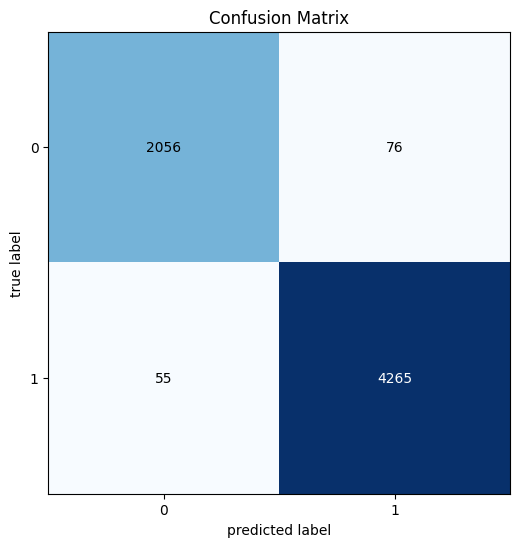

In [ ]:
# Confusion matrix
y_pred = (model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1)) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
plt.figure()
plot_confusion_matrix(cm, figsize=(8, 6))
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2132
           1       0.98      0.99      0.98      4320

    accuracy                           0.98      6452
   macro avg       0.98      0.98      0.98      6452
weighted avg       0.98      0.98      0.98      6452



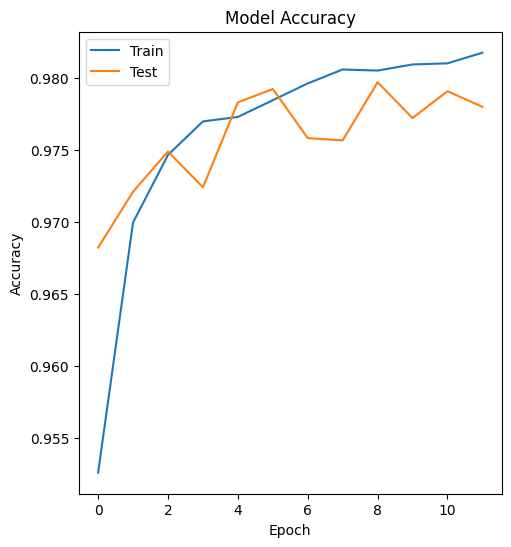

In [ ]:

# Plot accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')


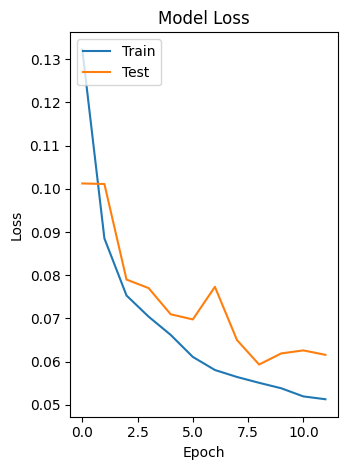

In [ ]:

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.tight_layout()
plt.show()



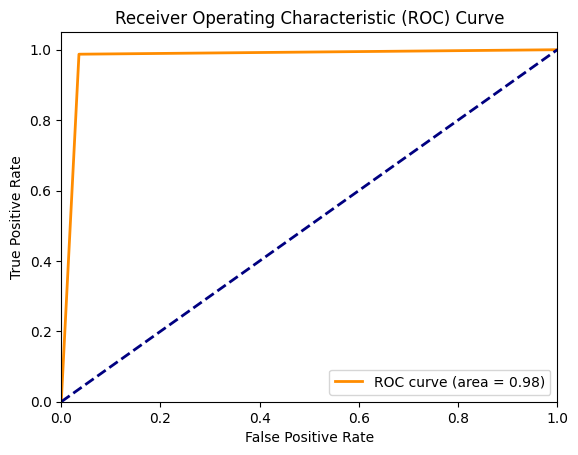

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



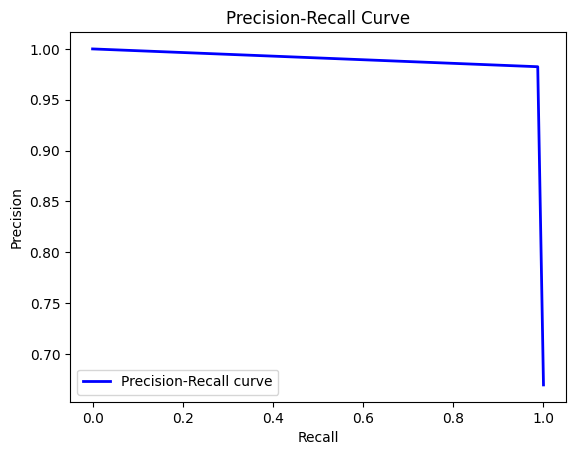

In [ ]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()



In [ ]:
#Predict on a single test case
print("Enter the features for a test case:")
test_case = []
feature_names = df.columns[1:-1]
for feature_name in feature_names:
    value = float(input(f"Enter the value for {feature_name}: "))
    test_case.append(value)

test_case = np.array(test_case).reshape(1, -1, 1)
predicted_prob = model.predict(test_case)[0][0]
predicted_label = "Benign" if predicted_prob > 0.5 else "Malicious"
print("\nTest Case:")
print(test_case)
print("Predicted Probability:", predicted_prob)
print("Predicted Label:", predicted_label)

Enter the features for a test case:
Enter the value for Machine: 332
Enter the value for DebugSize: 0
Enter the value for DebugRVA: 0
Enter the value for MajorImageVersion: 4
Enter the value for MajorOSVersion: 4
Enter the value for ExportRVA: 0
Enter the value for ExportSize: 0
Enter the value for IatVRA: 8520
Enter the value for MajorLinkerVersion: 6
Enter the value for MinorLinkerVersion: 0
Enter the value for NumberOfSections: 2
Enter the value for SizeOfStackReserve: 1048576
Enter the value for DllCharacteristics: 0
Enter the value for ResourceSize: 0
Enter the value for BitcoinAddresses: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step

Test Case:
[[[3.320000e+02]
  [0.000000e+00]
  [0.000000e+00]
  [4.000000e+00]
  [4.000000e+00]
  [0.000000e+00]
  [0.000000e+00]
  [8.520000e+03]
  [6.000000e+00]
  [0.000000e+00]
  [2.000000e+00]
  [1.048576e+06]
  [0.000000e+00]
  [0.000000e+00]
  [0.000000e+00]]]
Predicted Probability: 0.019342575
Predicted Label: Malicious


In [ ]:
# Choose a model for evaluation and prediction (example: LSTM)
chosen_model_type = "BiLSTM" #Change this to "BiLSTM", or "GRU" to use that model
model = models[chosen_model_type]
history = histories[chosen_model_type]


In [ ]:
# Evaluate the model
y_pred = (model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1)) > 0.5).astype("int32")

202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [ ]:
# Evaluate the model
accuracy = model.evaluate(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test, verbose=0)[1]
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.97


202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Confusion Matrix:
[[2090   42]
 [ 120 4200]]


<Figure size 640x480 with 0 Axes>

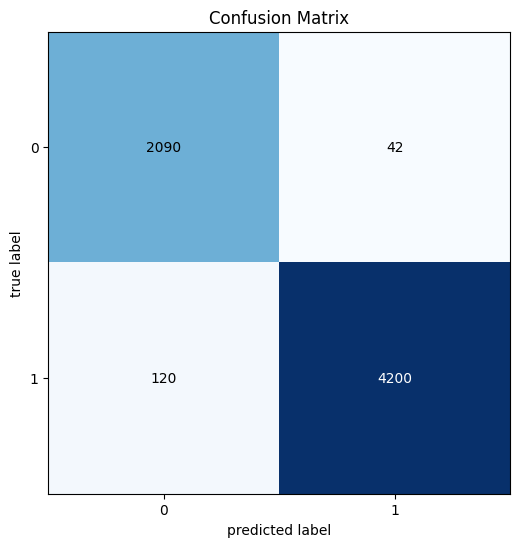

In [ ]:
# Confusion matrix
y_pred = (model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1)) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
plt.figure()
plot_confusion_matrix(cm, figsize=(8, 6))
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      2132
           1       0.99      0.97      0.98      4320

    accuracy                           0.97      6452
   macro avg       0.97      0.98      0.97      6452
weighted avg       0.98      0.97      0.98      6452



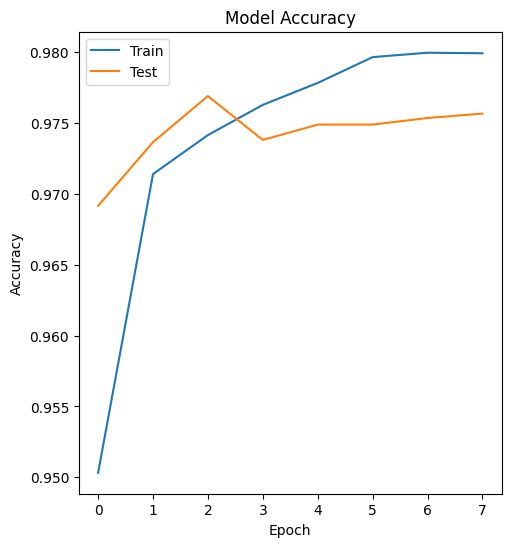

In [ ]:

# Plot accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')


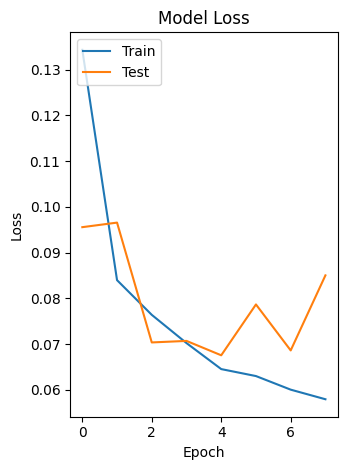

In [ ]:

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.tight_layout()
plt.show()



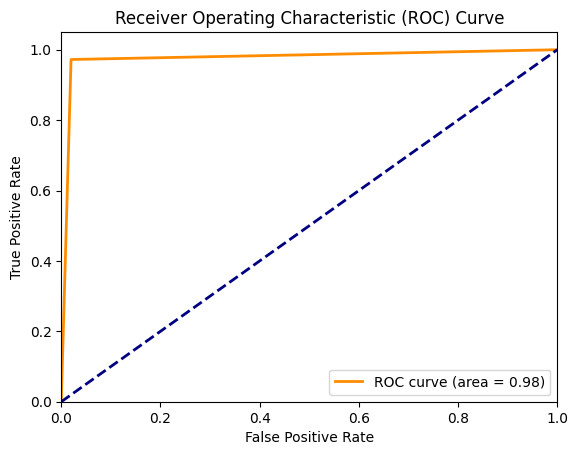

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



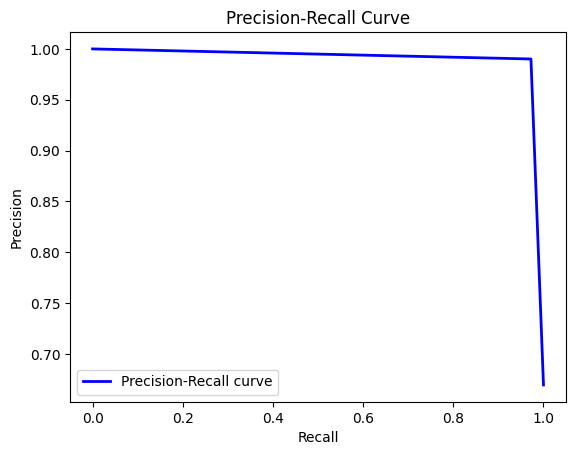

In [ ]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()



In [ ]:
#Predict on a single test case
print("Enter the features for a test case:")
test_case = []
feature_names = df.columns[1:-1]
for feature_name in feature_names:
    value = float(input(f"Enter the value for {feature_name}: "))
    test_case.append(value)

test_case = np.array(test_case).reshape(1, -1, 1)
predicted_prob = model.predict(test_case)[0][0]
predicted_label = "Benign" if predicted_prob > 0.5 else "Malicious"
print("\nTest Case:")
print(test_case)
print("Predicted Probability:", predicted_prob)
print("Predicted Label:", predicted_label)

Enter the features for a test case:
Enter the value for Machine: 332
Enter the value for DebugSize: 0
Enter the value for DebugRVA: 0
Enter the value for MajorImageVersion: 4
Enter the value for MajorOSVersion: 4
Enter the value for ExportRVA: 0
Enter the value for ExportSize: 0
Enter the value for IatVRA: 8520
Enter the value for MajorLinkerVersion: 6
Enter the value for MinorLinkerVersion: 0
Enter the value for NumberOfSections: 2
Enter the value for SizeOfStackReserve: 1048576
Enter the value for DllCharacteristics: 0
Enter the value for ResourceSize: 0
Enter the value for BitcoinAddresses: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step

Test Case:
[[[3.320000e+02]
  [0.000000e+00]
  [0.000000e+00]
  [4.000000e+00]
  [4.000000e+00]
  [0.000000e+00]
  [0.000000e+00]
  [8.520000e+03]
  [6.000000e+00]
  [0.000000e+00]
  [2.000000e+00]
  [1.048576e+06]
  [0.000000e+00]
  [0.000000e+00]
  [0.000000e+00]]]
Predicted Probability: 0.014407083
Predicted Label: Malicious


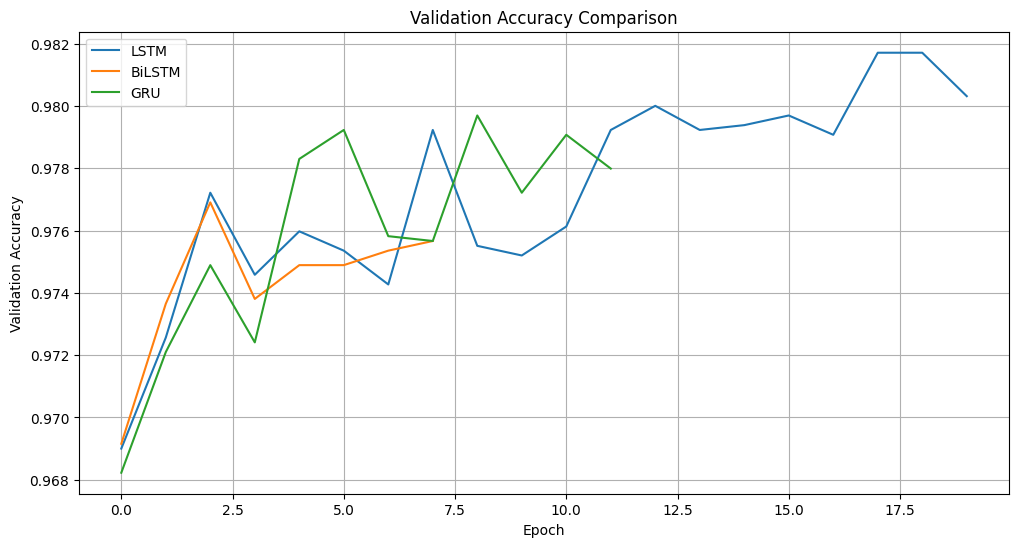

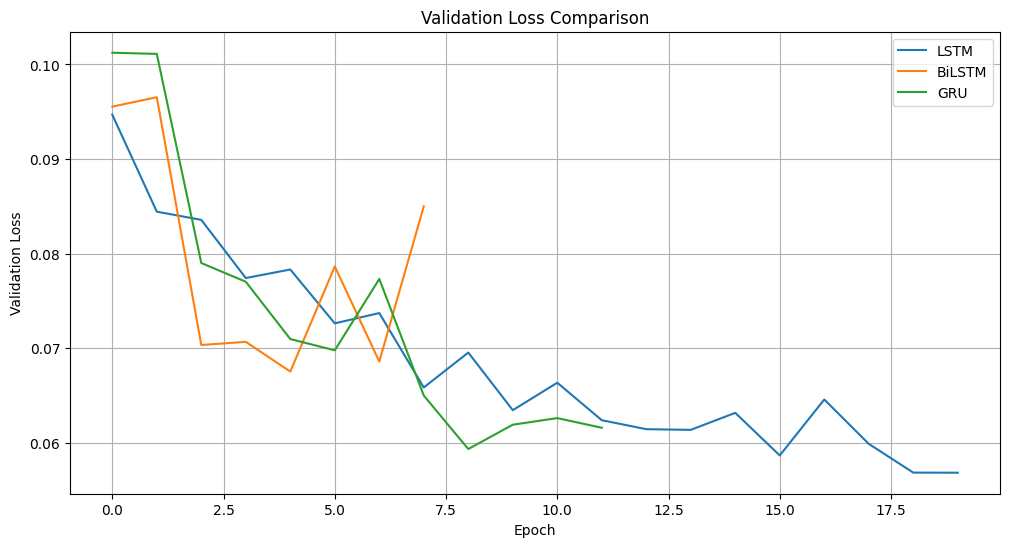

In [ ]:

# Assuming 'histories' dictionary contains training history for each model
# and 'models' contains the trained models.

plt.figure(figsize=(12, 6))

for model_type, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=model_type)

plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))

for model_type, history in histories.items():
    plt.plot(history.history['val_loss'], label=model_type)

plt.title('Validation Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Train Logistic Regression
logreg_model = LogisticRegression(max_iter=1000)  # Increased max_iter
logreg_model.fit(X_train, y_train)
logreg_pred = logreg_model.predict(X_test)

# Evaluate Logistic Regression
print("\nLogistic Regression:")
print(classification_report(y_test, logreg_pred))
print(confusion_matrix(y_test, logreg_pred))

# Train Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Evaluate Random Forest
print("\nRandom Forest:")
print(classification_report(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression:
              precision    recall  f1-score   support

           0       0.62      0.68      0.65      2132
           1       0.83      0.80      0.82      4320

    accuracy                           0.76      6452
   macro avg       0.73      0.74      0.73      6452
weighted avg       0.76      0.76      0.76      6452

[[1446  686]
 [ 875 3445]]

Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2132
           1       1.00      0.99      0.99      4320

    accuracy                           0.99      6452
   macro avg       0.99      0.99      0.99      6452
weighted avg       0.99      0.99      0.99      6452

[[2113   19]
 [  34 4286]]
